# Tarea - Ajuste de curvas

In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

---
### Problema 1

Los siguientes datos representan el costo en dólares de la electricidad según Western Electricity Coordinating Council desde el 2014 (y su pronóstico para el 2040)

Tomado de:
https://www.quandl.com/data/EIA/AEO_2016_REF_NO_CPP_PRCE_NA_COMM_NA_ELC_NA_WECCRKS_NCNTPKWH_A-Electricity-End-Use-Prices-Commercial-Western-Electricity-Coordinating-Council-Rockies-No-CPP-AEO2016

In [68]:
# Datos extraidos de la página de quandl
data = np.array([10.051101,  9.259127,  9.444813,  9.557723,  9.977324, 10.298326,
       10.447217, 10.550506, 10.590784, 10.657418, 10.743085, 10.831965,
       10.988435, 11.153055, 11.313326, 11.557165, 11.860136, 12.122511,
       12.356448, 12.611391, 12.814569, 13.111372, 13.357134, 13.559012,
       13.85861 , 14.135924, 14.436149])

1. Ajuste estos datos a polinomios de grado 1 hasta 3 (los datos en $x$ corresponden a los años de 2014 a 2040, sin embargo son valores muy grandes para elevarlos a una potencia, use una representación para estos años, por ejemplo $2014 \rightarrow 0$ y $2040\rightarrow 27$).

2. Muestre las tres curvas ajustadas junto a los datos de los costos en un solo gráfico

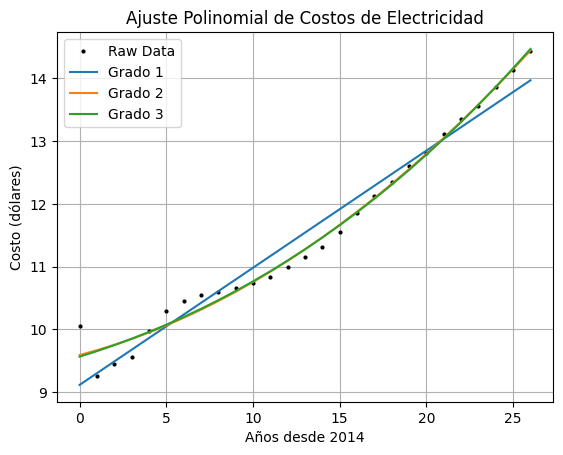

In [69]:
import scipy.optimize as opt
def fhat(beta, x):
    X = np.array([x**i for i in range(len(beta))]).T
    return X@beta

def error3(beta, x, y):
    return np.sum((y - fhat(beta, x))**2)

y1 = data
x1 = np.arange(len(y1))
plt.plot(x1, y1, 'ok', ms=2, label='Raw Data')
 
for grado in range(1, 4):
    beta_inicial = np.random.rand(grado + 1)
    sol = opt.minimize(error3, beta_inicial, args=(x1, y1))
    y_fit = fhat(sol.x, x1)
    plt.plot(x1, y_fit, label=f'Grado {grado}')

plt.title('Ajuste Polinomial de Costos de Electricidad')
plt.xlabel('Años desde 2014')
plt.ylabel('Costo (dólares)')
plt.legend()
plt.grid()
plt.show()

---

___
### Problema 2

El archivo `population_data.csv` contiene información histórica anual de México relativa a la población, nacimientos y muertes desde el año 1950 hasta el año 2015. La primer columna corresponde a los años, la segunda a la población, la tercera a los nacimientos y la última a los decesos.

Tomado de: https://en.wikipedia.org/wiki/Demographics_of_Mexico.

Importe estos datos usando la función `read_csv` del paquete `pandas`

1. Usando los años como variable independiente $x$ y la población como variable dependiente $y$, ajustar polinomios de grado 1 hasta grado 3.

    * Mostrar en un solo gráfico los datos de población contra los años, y los polinomios ajustados.

    * Graficar el error cuadrático acumulado contra el número de términos.

2. Repetir el punto 1 usando los nacimientos como variable dependiente $y$. Grafique las curvas ajustadas junto con los datos de nacimientos. Vea en un gráfico el error acumulado.

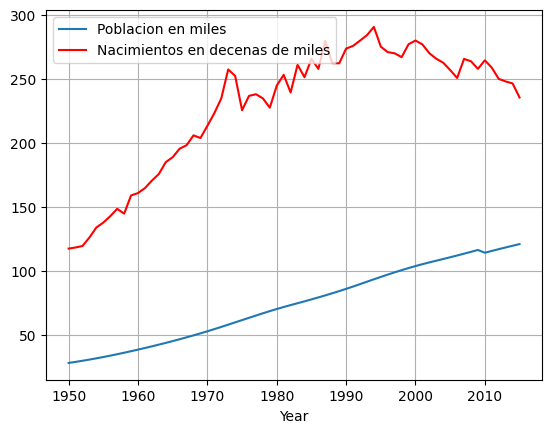

In [70]:
data_pop = pd.read_csv('population_data.csv')

plt.plot(data_pop.values[:,0],data_pop.values[:,1]/1000,label=data_pop.columns[1]+' en miles')
plt.plot(data_pop.values[:,0],data_pop.values[:,2]/10000,'r',label=data_pop.columns[2]+' en decenas de miles')
plt.legend(loc=2)
plt.xlabel(data_pop.columns[0])
plt.grid()


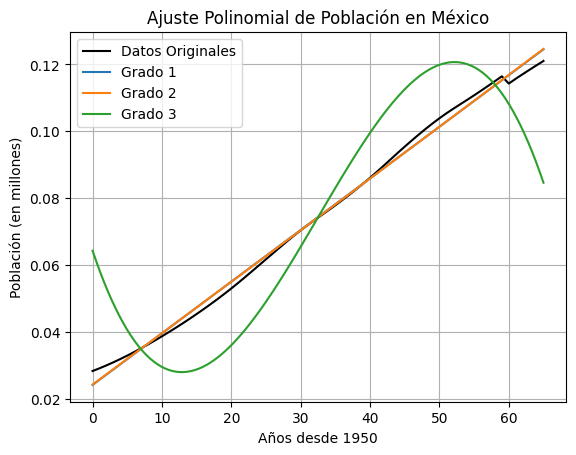

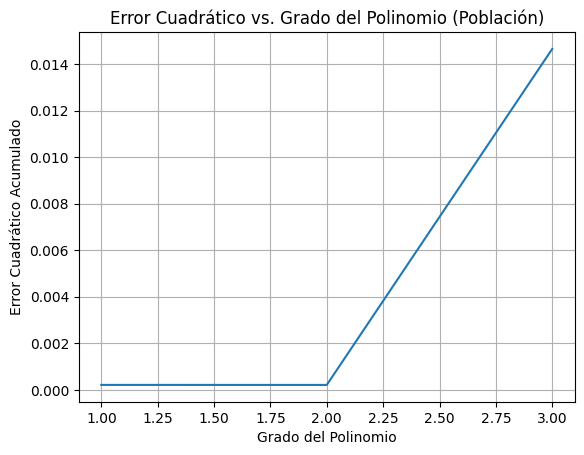

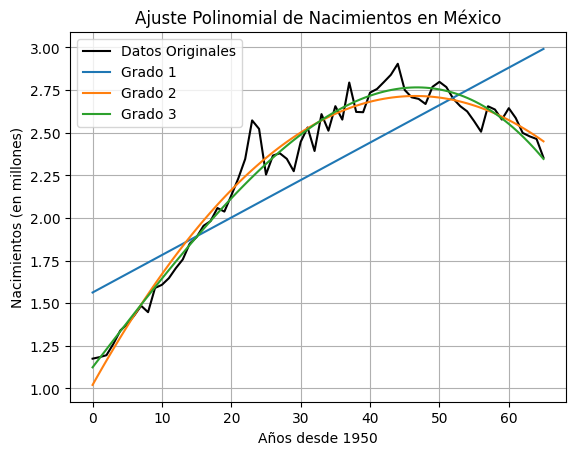

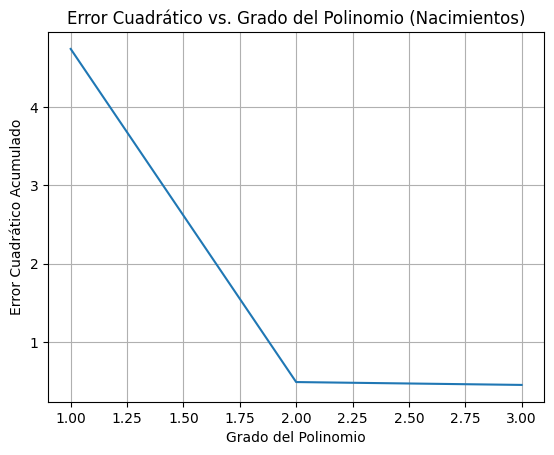

In [96]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.optimize as opt

def fhat(beta, x):
    X_poly = np.array([x**i for i in range(len(beta))]).T
    return X_poly @ beta

def error_cuadratico(beta, x, y):
    y_pred = fhat(beta, x)
    return np.sum((y - y_pred)**2)


column_names = ['Year', 'Población', 'Nacimientos', 'Defunciones']
data_pop_raw = pd.read_csv('population_data.csv', header=None, names=column_names)

#Esta parte para limpiar los datos me ayudo la IA, no me dejaba limpiar el str.
data_pop = data_pop_raw.apply(pd.to_numeric, errors='coerce').dropna()
data_pop = data_pop.astype(int)


x_pop = data_pop['Year'].values
x_scaled = x_pop - x_pop.min()
y_pob = data_pop['Población'].values
y_pob_scaled = y_pob / 1000000 
y_nac = data_pop['Nacimientos'].values
y_nac_scaled = y_nac / 1000000

plt.plot(x_scaled, y_pob_scaled, '-k', ms=2, label='Datos Originales')

errores_pob = []
grados = np.arange(1, 4)
x_fit = np.linspace(x_scaled.min(), x_scaled.max(), 120)

for grado in grados:
    beta_inicial = np.random.rand(grado + 1)
    sol = opt.minimize(error_cuadratico, beta_inicial, args=(x_scaled, y_pob_scaled))
    
    y_fit = fhat(sol.x, x_fit)
    errores_pob.append(sol.fun)
    
    plt.plot(x_fit, y_fit, label=f'Grado {grado}')

plt.title('Ajuste Polinomial de Población en México')
plt.xlabel('Años desde 1950')
plt.ylabel('Población (en millones)')
plt.legend()
plt.grid()
plt.show()

plt.plot(grados, errores_pob, '-')
plt.title('Error Cuadrático vs. Grado del Polinomio (Población)')
plt.xlabel('Grado del Polinomio')
plt.ylabel('Error Cuadrático Acumulado')
plt.grid()
plt.show()


plt.plot(x_scaled, y_nac_scaled, '-k', ms=2, label='Datos Originales')

errores_nac = []

for grado in grados:
    beta_inicial = np.random.rand(grado + 1)
    sol = opt.minimize(error_cuadratico, beta_inicial, args=(x_scaled, y_nac_scaled))
    
    y_fit = fhat(sol.x, x_fit)
    errores_nac.append(sol.fun)
    
    plt.plot(x_fit, y_fit, label=f'Grado {grado}')

plt.title('Ajuste Polinomial de Nacimientos en México')
plt.xlabel('Años desde 1950')
plt.ylabel('Nacimientos (en millones)')
plt.legend()
plt.grid()
plt.show()


plt.plot(grados, errores_nac, '-')
plt.title('Error Cuadrático vs. Grado del Polinomio (Nacimientos)')
plt.xlabel('Grado del Polinomio')
plt.ylabel('Error Cuadrático Acumulado')
plt.grid()
plt.show()

---